### Import Lib

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


### Import Dataset

In [122]:
data = pd.read_csv('./data/Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [123]:
data.head(5)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Creating Testing and Training Dataset/Data Cleaning 

In [124]:
X  = data.drop(['Customer Name','Customer e-mail','Country', 'Car Purchase Amount'], axis= 1)

In [125]:
X.head(5)

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671


In [126]:
y = data['Car Purchase Amount']

In [127]:
y.head(5)

0    35321.45877
1    45115.52566
2    42925.70921
3    67422.36313
4    55915.46248
Name: Car Purchase Amount, dtype: float64

In [128]:
X.shape

(500, 5)

In [129]:
y.shape

(500,)

In [130]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [131]:
scaler.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [132]:
scaler.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [133]:
y = y.values.reshape(-1,1)

In [134]:
y_scaled = scaler.fit_transform(y)

### Training the model

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

In [136]:
model = Sequential()
model.add(Dense(40, input_dim = 5, activation= 'relu'))
model.add(Dense(40, activation= 'relu'))
model.add(Dense(1, activation= 'linear'))

In [137]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                240       
                                                                 
 dense_16 (Dense)            (None, 40)                1640      
                                                                 
 dense_17 (Dense)            (None, 1)                 41        
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________


In [138]:
model.compile(optimizer='adam', loss= 'mean_squared_error' )

In [139]:
epochs_hist = model.fit(X_train, y_train, epochs= 10, batch_size= 50, verbose= 1, validation_split= 0.2)

Epoch 1/10
6/6 [==============================] - 0s 19ms/step - loss: 0.2014 - val_loss: 0.1896
Epoch 2/10
6/6 [==============================] - 0s 5ms/step - loss: 0.1247 - val_loss: 0.1190
Epoch 3/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0708 - val_loss: 0.0669
Epoch 4/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0389 - val_loss: 0.0370
Epoch 5/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0270 - val_loss: 0.0274
Epoch 6/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0241 - val_loss: 0.0229
Epoch 7/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.0175
Epoch 8/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0140 - val_loss: 0.0145
Epoch 9/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0116 - val_loss: 0.0131
Epoch 10/10
6/6 [==============================] - 0s 5ms/step - loss: 0.0104 - val_loss: 0.0115


### Model Evaluation

In [140]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

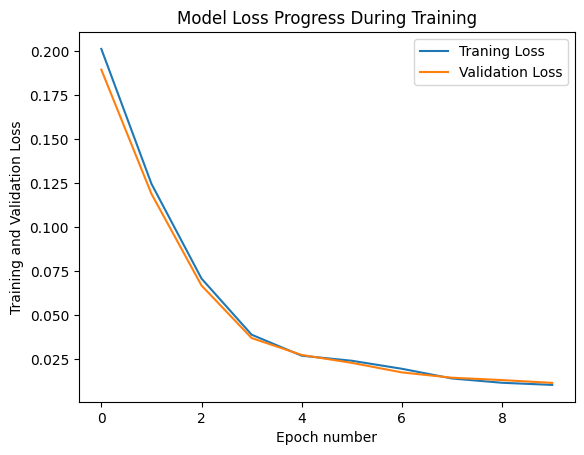

In [141]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Traning Loss', 'Validation Loss'])

In [144]:
# Gender, Age, Annual Salary, Credit Card Debt, Net worth
X_test = np.array([[1,60,160000,3500, 75000]])
y_predict = model.predict(X_test)


1/1 [==============================] - 0s 16ms/step


In [145]:
print('Expected purchase amount: ', y_predict)

Expected purchase amount:  [[92930.85]]
